In [1]:
import pandas as pd
import numpy as np

pd.options.display.width = 200
pd.set_option('display.max_columns', 7)

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

In [4]:
url='/mnt/data/toxic_comments.csv'
comments = pd.read_csv(url)
comments

Unnamed: 0                                               text  toxic
0              0  you have yet to identify where my edits violat...      0
1              1  "\n as i have already said,wp:rfc or wp:ani. (...      0
2              2  your vote on wikiquote simple english when it ...      0
3              3  your stalking of my edits i've opened a thread...      0
4              4  straight from the smear site itself. the perso...      1
...          ...                                                ...    ...
4995        4995  "\nyeah, sorry about that.  i didn't look clos...      0
4996        4996  "hmm, interesting.. oh, why would i make fun o...      0
4997        4997  "put up or shut up\nto all you people who thin...      1
4998        4998  this is your last warning \nim warning u respo...      1
4999        4999  sammy\nyes i can see why it might be considere...      0

[5000 rows x 3 columns]

In [5]:
comments['toxic'] = comments.toxic.astype(int)
comments.toxic.value_counts()

toxic
0    4350
1     650
Name: count, dtype: int64

Text(0.5, 1.0, 'Toxic vs Non-Toxic Comments')

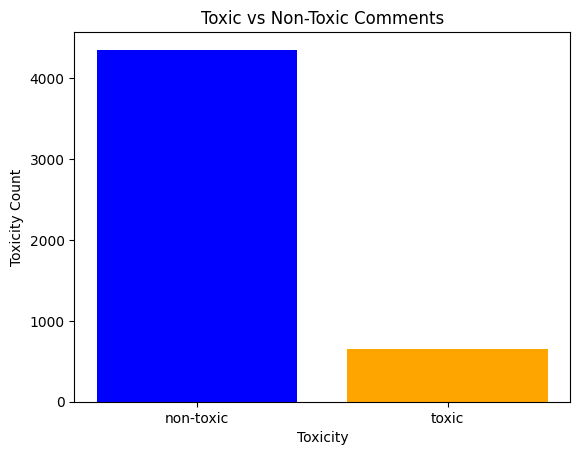

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

counts=comments.toxic.value_counts()

Index = [1,2]
plt.bar(Index,counts,color=['blue', 'orange'])
plt.xticks(Index,['non-toxic','toxic'])
plt.ylabel('Toxicity Count')
plt.xlabel('Toxicity')
plt.title('Toxic vs Non-Toxic Comments')

In [7]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean_tweet(raw_tweet):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_tweet).get_text()
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ",review_text)
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    # 4. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [9]:
comments['clean_text']=comments['text'].apply(lambda x: clean_tweet(x))
comments['word_count'] = comments['clean_text'].apply(lambda x: len(str(x).split(" ")))
comments.head()

<ipython-input-8-a666c51b2e31>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_tweet).get_text()


Unnamed: 0                                               text  toxic                                         clean_text  word_count
0           0  you have yet to identify where my edits violat...      0        yet identify edits violated policy july utc           7
1           1  "\n as i have already said,wp:rfc or wp:ani. (...      0              already said wp rfc wp ani talk track           8
2           2  your vote on wikiquote simple english when it ...      0  vote wikiquote simple english comes using syso...          54
3           3  your stalking of my edits i've opened a thread...      0        stalking edits opened thread stalking edits           6
4           4  straight from the smear site itself. the perso...      1  straight smear site person called dissident so...          11

In [10]:
from nltk.tokenize import WhitespaceTokenizer
tok = WhitespaceTokenizer()

def simple_tokenizer(input_text):
    tokens = tok.tokenize(input_text)
    return tokens

comments['clean_text_tokens'] = comments['clean_text'].apply(lambda d: simple_tokenizer(d))
comments.head(1)

Unnamed: 0                                               text  toxic                                   clean_text  word_count                                  clean_text_tokens
0           0  you have yet to identify where my edits violat...      0  yet identify edits violated policy july utc           7  [yet, identify, edits, violated, policy, july,...

In [11]:
from collections import Counter
toxic_data = comments[comments['toxic'] == 1]
toxic_data.toxic.value_counts()

toxic
1    650
Name: count, dtype: int64

In [12]:
nontoxic_data = comments[comments['toxic'] == 0]
nontoxic_data.toxic.value_counts()

toxic
0    4350
Name: count, dtype: int64

In [13]:
combined_list = sum(toxic_data['clean_text_tokens'].tolist(), [])
print(len(combined_list))

12544


In [14]:
token_counts = Counter(combined_list)
token_counts.most_common(5)

[('buttsecks', 497),
 ('hate', 468),
 ('bastered', 435),
 ('idiot', 308),
 ('vomit', 217)]

In [15]:
combined_list = sum(nontoxic_data['clean_text_tokens'].tolist(), [])
print(len(combined_list))

97994


In [16]:
token_counts = Counter(combined_list)
token_counts.most_common(5)

[('article', 1252),
 ('page', 974),
 ('talk', 895),
 ('wikipedia', 863),
 ('please', 736)]

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
non_toxic_list = nontoxic_data['clean_text'].values
non_toxic_list = ' '.join(non_toxic_list)
len(non_toxic_list)

697538

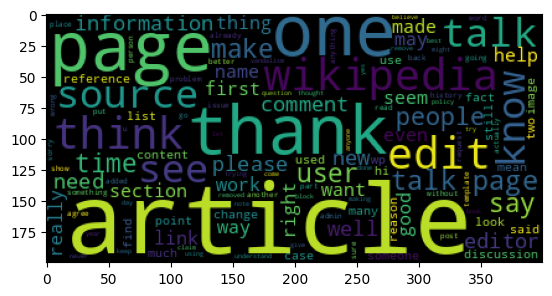

In [18]:
wc = WordCloud().generate(non_toxic_list)
plt.imshow(wc)

In [63]:
toxic_word_counts = Counter(toxic_list.split())
non_toxic_word_counts = Counter(non_toxic_list.split())
toxic_word_counts.most_common(5)

[('buttsecks', 497),
 ('hate', 468),
 ('bastered', 435),
 ('idiot', 308),
 ('vomit', 217)]

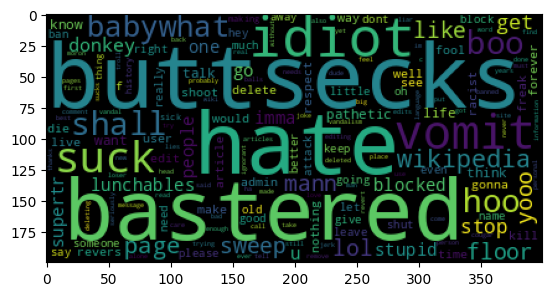

In [64]:
non_toxic_word_counts.most_common(5)
wc = WordCloud().generate_from_frequencies(toxic_word_counts)
plt.imshow(wc)

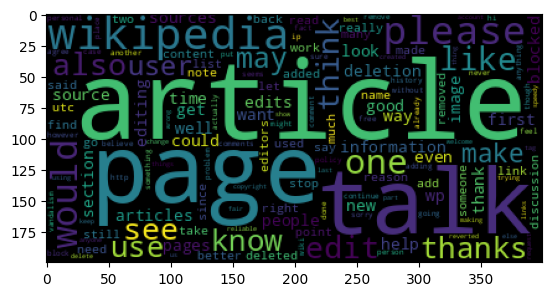

In [65]:
wc = WordCloud().generate_from_frequencies(non_toxic_word_counts)
plt.imshow(wc)

In [66]:
X = comments['clean_text'].values
y = comments['toxic'].values
X[0]

y

array([0, 0, 0, ..., 1, 1, 0])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)

(4000,)
(4000,)
(1000,)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer



In [27]:
pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer = "word")),
    ('classifier', LogisticRegression(max_iter=2000,random_state=42))
])
pipeline1.steps

pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer = "word")),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline2.steps

pipeline3 = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer = "word")),
    ('classifier', MultinomialNB())
])
pipeline3.steps

[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())]

In [28]:
from sklearn.model_selection import GridSearchCV
from time import time
def log(x):
    #can be used to write to log file
    print(x)

# Utility function to report best scores (from scikit-learn.org)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            log("Model with rank: {0}".format(i))
            log("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            log("Parameters: {0}".format(results['params'][candidate]))
            log("")

In [29]:
param_grid1 = {"classifier__C": [0.001, 0.01, 0.1, 1, 10, 100]
              }
cv_grid1 = GridSearchCV(
    pipeline1,    # pipeline from above
    param_grid1,      # parameters to tune via cross validation
    n_jobs=1,     # number of cores to use for parallelization; -1 for "all cores"
    cv=5)         # what type of cross validation to use


import time as ttt
now = time()
log(ttt.ctime())

cv_grid1.fit(X_train, y_train)

report(cv_grid1.cv_results_, n_top=10)

log(100*"-")
log(ttt.ctime())
log("Search (5-fold cross validation) took %.5f seconds for %d candidate parameter settings."
        % (time() - now, len(cv_grid1.cv_results_['params'])))
log('')
log(100*"-")
log("The best parameters are %s with a score of %0.5f"
        % (cv_grid1.best_params_, cv_grid1.best_score_))

Fri Nov  1 18:50:56 2024
Model with rank: 1
Mean validation score: 0.90575 (std: 0.00669)
Parameters: {'classifier__C': 100}

Model with rank: 2
Mean validation score: 0.90525 (std: 0.00696)
Parameters: {'classifier__C': 10}

Model with rank: 3
Mean validation score: 0.88275 (std: 0.00374)
Parameters: {'classifier__C': 1}

Model with rank: 4
Mean validation score: 0.87200 (std: 0.00061)
Parameters: {'classifier__C': 0.001}

Model with rank: 4
Mean validation score: 0.87200 (std: 0.00061)
Parameters: {'classifier__C': 0.01}

Model with rank: 4
Mean validation score: 0.87200 (std: 0.00061)
Parameters: {'classifier__C': 0.1}

----------------------------------------------------------------------------------------------------
Fri Nov  1 18:51:11 2024
Search (5-fold cross validation) took 15.19161 seconds for 6 candidate parameter settings.

----------------------------------------------------------------------------------------------------
The best parameters are {'classifier__C': 100} wit

In [30]:
best_logit = cv_grid1.best_estimator_
best_logit

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(C=100, max_iter=2000, random_state=42))])

In [67]:
param_grid2 = {"classifier__criterion": ["gini", "entropy"],
             }
cv_grid2 = GridSearchCV(
    pipeline2,    # pipeline from above
    param_grid2,      # parameters to tune via cross validation
    n_jobs=1,     # number of cores to use for parallelization; -1 for "all cores"
    cv=5)         # what type of cross validation to use


import time as ttt
now = time()
log(ttt.ctime())

cv_grid2.fit(X_train, y_train)

report(cv_grid2.cv_results_, n_top=10)

log(100*"-")
log(ttt.ctime())
log("Search (5-fold cross validation) took %.5f seconds for %d candidate parameter settings."
        % (time() - now, len(cv_grid2.cv_results_['params'])))
log('')
log(100*"-")
log("The best parameters are %s with a score of %0.5f"
        % (cv_grid2.best_params_, cv_grid2.best_score_))

Fri Nov  1 19:11:58 2024
Model with rank: 1
Mean validation score: 0.73462 (std: 0.03062)
Parameters: {'classifier__criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.72885 (std: 0.02184)
Parameters: {'classifier__criterion': 'gini'}

----------------------------------------------------------------------------------------------------
Fri Nov  1 19:12:07 2024
Search (5-fold cross validation) took 9.09507 seconds for 2 candidate parameter settings.

----------------------------------------------------------------------------------------------------
The best parameters are {'classifier__criterion': 'entropy'} with a score of 0.73462


In [32]:
best_forest = cv_grid2.best_estimator_
best_forest

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [33]:
param_grid3 = {
  'classifier__alpha': np.linspace(0.5, 1.5, 6),
  'classifier__fit_prior': [True, False],
}

In [34]:
cv_grid3 = GridSearchCV(
    pipeline3,    # pipeline from above
    param_grid3,      # parameters to tune via cross validation
    n_jobs=1,     # number of cores to use for parallelization; -1 for "all cores"
    cv=5)         # what type of cross validation to use


import time as ttt
now = time()
log(ttt.ctime())

cv_grid3.fit(X_train, y_train)

report(cv_grid3.cv_results_, n_top=10)

log(100*"-")
log(ttt.ctime())
log("Search (5-fold cross validation) took %.5f seconds for %d candidate parameter settings."
        % (time() - now, len(cv_grid3.cv_results_['params'])))
log('')
log(100*"-")
log("The best parameters are %s with a score of %0.5f"
        % (cv_grid3.best_params_, cv_grid3.best_score_))

Fri Nov  1 18:52:23 2024
Model with rank: 1
Mean validation score: 0.89225 (std: 0.00184)
Parameters: {'classifier__alpha': 0.5, 'classifier__fit_prior': False}

Model with rank: 2
Mean validation score: 0.89000 (std: 0.00250)
Parameters: {'classifier__alpha': 0.7, 'classifier__fit_prior': False}

Model with rank: 3
Mean validation score: 0.88725 (std: 0.00382)
Parameters: {'classifier__alpha': 0.9, 'classifier__fit_prior': False}

Model with rank: 4
Mean validation score: 0.88525 (std: 0.00599)
Parameters: {'classifier__alpha': 1.1, 'classifier__fit_prior': False}

Model with rank: 5
Mean validation score: 0.88425 (std: 0.00660)
Parameters: {'classifier__alpha': 1.5, 'classifier__fit_prior': False}

Model with rank: 6
Mean validation score: 0.88425 (std: 0.00687)
Parameters: {'classifier__alpha': 1.3, 'classifier__fit_prior': False}

Model with rank: 7
Mean validation score: 0.87800 (std: 0.00332)
Parameters: {'classifier__alpha': 0.5, 'classifier__fit_prior': True}

Model with rank: 

In [35]:
best_mnb = cv_grid3.best_estimator_
best_mnb

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', MultinomialNB(alpha=0.5, fit_prior=False))])

In [36]:
import tabulate
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
# iterate over classifiers to see which classifier gives best result

clfs = [
        best_logit,
        best_forest,
        best_mnb,
       ]

models  = [
            "LogisticRegression",
            "RandomForest",
            "MultinomialNB",
          ]

table = []
cv = 5

for name, clf in zip(models, clfs):

    now = time()

    print('')
    print('=' * 80)
    print(str(name))
    print('-' * 80)

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

    scores = cross_validate(clf,
                            X_train,
                            y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False,
                            n_jobs=8)

    fit_time = list(scores['fit_time'])
    score_time = list(scores['score_time'])

    accuracy = list(scores['test_accuracy'])
    recall = list(scores['test_recall_weighted'])
    precision = list(scores['test_precision_weighted'])
    f1 = list(scores['test_f1_weighted'])

    print('')
    print('-' * 80)
    print('N-FOLD CROSS VALIDATION RESULT: k={0}'.format(cv))
    print('-' * 80)
    print('n-fold cv completed in: %0.5fs' % (time() - now))
    print('n-fold fit_time       : %0.5fs' % (np.sum(fit_time)))
    print('n-fold score_time     : %0.5fs' % (np.sum(score_time)))
    print('-' * 80)
    print('n-fold average accuracy  : %0.5f (STD +/- %0.2f)' % (np.mean(accuracy), np.std(accuracy) * 2))
    print('n-fold average recall    : %0.5f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2))
    print('n-fold average precision : %0.5f (STD +/- %0.2f)' % (np.mean(precision), np.std(precision) * 2))
    print('n-fold average f1        : %0.5f (STD +/- %0.2f)' % (np.mean(f1), np.std(f1) * 2))
    print('')

    # Aggregate our scores and add to the table.
    row = [str(name)]
    s = ('%0.5f (STD +/- %0.2f)' % (np.mean(accuracy), np.std(accuracy) * 2))
    row.append(s)
    s = ('%0.5f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2))
    row.append(s)
    s = ('%0.5f (STD +/- %0.2f)' % (np.mean(precision), np.std(precision) * 2))
    row.append(s)
    s = ('%0.5f (STD +/- %0.2f)' % (np.mean(f1), np.std(f1) * 2))
    row.append(s)

    table.append(row)


# Sort the models by F1 score descending
fields = ['model', 'accuracy', 'recall', 'precision', 'f1']

print('')
print('*' * 120)
#table.sort(key=lambda row: row[-1], reverse=True)
print(tabulate.tabulate(table, headers=fields))
print('-' * 120)
print("...Done...\n")


LogisticRegression
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
N-FOLD CROSS VALIDATION RESULT: k=5
--------------------------------------------------------------------------------
n-fold cv completed in: 9.37791s
n-fold fit_time       : 7.57050s
n-fold score_time     : 1.14593s
--------------------------------------------------------------------------------
n-fold average accuracy  : 0.90575 (STD +/- 0.01)
n-fold average recall    : 0.90575 (STD +/- 0.01)
n-fold average precision : 0.89539 (STD +/- 0.02)
n-fold average f1        : 0.89288 (STD +/- 0.02)


RandomForest
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
N-FOLD CROSS VALIDATION RESULT: k=5
--------------------------------------------------------------------------------
n-fold cv completed in: 1

In [37]:
clfs


[Pipeline(steps=[('tfidf', TfidfVectorizer()),
                 ('classifier',
                  LogisticRegression(C=100, max_iter=2000, random_state=42))]),
 Pipeline(steps=[('tfidf', TfidfVectorizer()),
                 ('classifier', RandomForestClassifier(random_state=42))]),
 Pipeline(steps=[('tfidf', TfidfVectorizer()),
                 ('classifier', MultinomialNB(alpha=0.5, fit_prior=False))])]

In [38]:
models

['LogisticRegression', 'RandomForest', 'MultinomialNB']

In [39]:
F1_scores=[]

for model, clf in zip(models, clfs):
    pred = clf.predict(X_test)
    f1 = f1_score(pred,y_test, average="weighted")
    F1_scores.append(f1)
    print('F1 of '+model+' is '+str(f1))

precision


F1 of LogisticRegression is 0.9265482583137075
F1 of RandomForest is 0.9209759992485087
F1 of MultinomialNB is 0.9164849846782431


Text(0.5, 1.0, 'F1-scores of Models')

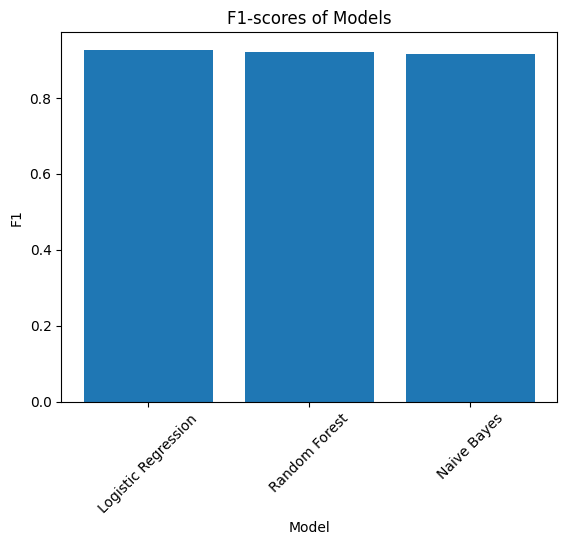

In [83]:
Index = [1,2,3]
plt.bar(Index,F1_scores)
plt.xticks(Index, models,rotation=45)
plt.ylabel('F1')
plt.xlabel('Model')
plt.title('F1-scores of Models')

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = best_logit.predict(X_test)
target_names = ['non-toxic', 'toxic']
print(classification_report(y_test, y_pred, digits=4, target_names=target_names))

              precision    recall  f1-score   support

   non-toxic     0.8045    0.7810    0.7926       137
       toxic     0.7638    0.7886    0.7760       123

    accuracy                         0.7846       260
   macro avg     0.7841    0.7848    0.7843       260
weighted avg     0.7852    0.7846    0.7847       260



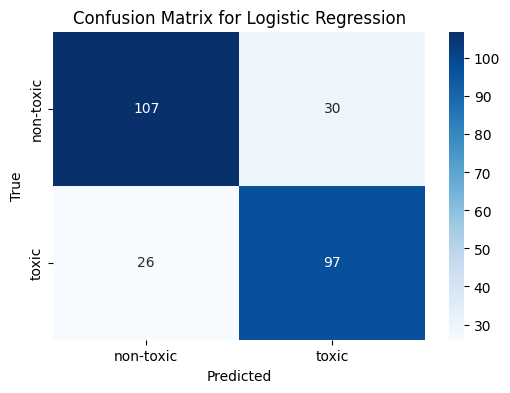

In [70]:

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [43]:
X_test[0:10]

array(['still enigma two people like albanians greeks lived helped many thousands years despise',
       'find alternative images remember fair use policy dictates fu images used contribute significantly article decorative element',
       'article long removed lot non muhammad pictures text bloated unnecessary article talk length everything thats sub article links like articles one page trimmed talk contribs',
       'applicant waits three days without food shelter encouragement may enter begin training tyler durden certainly lacking encouragement department yet still edit blown anyone alone deserves recognition additionally work good getting thrown afd first edit tough like learning fight crawling trenches first time matter happens please feel free contact help much',
       'unblockits school students got carried away sorry',
       'im sorry copy website guess ill delete',
       'indeed believe mentioned every separatist group listed',
       'say else templates usually funny case

In [71]:
y_test[0:35]

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [72]:
new_reviews = ["the king is an aweful human and must shut up", "I really enjoyed the flight, but the food was bad"]
new_results = best_logit.predict_proba(new_reviews)
print(new_results)

[[0.00626788 0.99373212]
 [0.77223866 0.22776134]]


In [73]:
target_names

['non-toxic', 'toxic']

In [74]:
for i, sentence in enumerate(new_reviews):
    print("Text: [{}]".format(sentence))
    print("Probabilities:")
    print("- {} (class 0): {:.4f}".format(target_names[0], new_results[i][0]))
    print("- {} (class 1): {:.4f}".format(target_names[1], new_results[i][1]))
    print("")

Text: [the king is an aweful human and must shut up]
Probabilities:
- non-toxic (class 0): 0.0063
- toxic (class 1): 0.9937

Text: [I really enjoyed the flight, but the food was bad]
Probabilities:
- non-toxic (class 0): 0.7722
- toxic (class 1): 0.2278



In [48]:
best_forest.steps

[('tfidf', TfidfVectorizer()),
 ('classifier', RandomForestClassifier(random_state=42))]

In [49]:
X_columns=best_forest.named_steps['tfidf'].get_feature_names_out()
importances = best_forest.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
top_30_indices = indices[0:30]
print(top_30_indices)

[ 6199 12510 12572 11765  9358  7449  7090  5434 10393  6219  3664 12578
 11776  7619  6849   820  1091  8321  5749  4967  5880  1095  7463 12813
  7583  5341 11612  5776  9609  3933]


In [50]:
# Rearrange feature names so they match the sorted feature importances
feature_names = [X_columns[i] for i in top_30_indices]
for f in range(top_30_indices.shape[0]):
    print("%2d) %-*s %0.9f" % (f + 1, 20,
                            X_columns[top_30_indices[f]],
                            importances[top_30_indices[f]]))

 1) idiot                0.026833082
 2) stupid               0.022065921
 3) suck                 0.019916468
 4) shut                 0.011774776
 5) pathetic             0.010948431
 6) life                 0.008676208
 7) kill                 0.007254002
 8) go                   0.007142213
 9) racist               0.007023873
10) ignorant             0.006406502
11) disgusting           0.005642949
12) sucks                0.005623173
13) sick                 0.005193385
14) loser                0.005167296
15) jerk                 0.005161990
16) article              0.004965113
17) balls                0.004944715
18) moron                0.004684635
19) hate                 0.004524387
20) fool                 0.004432392
21) hey                  0.004132726
22) ban                  0.004105430
23) like                 0.004085119
24) talk                 0.003947525
25) lol                  0.003695858
26) get                  0.003641457
27) seriously            0.003601895
2

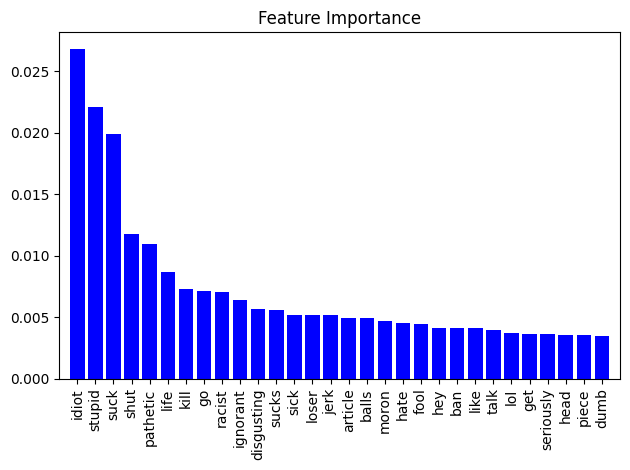

In [75]:
plt.title('Feature Importance')
plt.bar(range(top_30_indices.shape[0]),
              importances[top_30_indices],
              color='blue',
              align='center')
plt.xticks(range(top_30_indices.shape[0]),
                feature_names,
                rotation=90)
plt.xlim([-1, top_30_indices.shape[0]])
plt.tight_layout()
plt.show()

In [52]:
non_toxic_comments = comments[comments['toxic'] == 0]
print(len(non_toxic_comments))

sampled_non_toxic_comments = non_toxic_comments.sample(n=650, random_state=42)
print(len(sampled_non_toxic_comments))

toxic_comments = comments[comments['toxic'] == 1]
print(len(toxic_comments))

4350
650
650


In [53]:
combined_df = pd.concat([sampled_non_toxic_comments, toxic_comments], ignore_index=True)
combined_df.toxic.value_counts()

toxic
0    650
1    650
Name: count, dtype: int64

In [54]:
X = combined_df['clean_text'].values
y = combined_df['toxic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1040,)
(1040,)
(260,)
(260,)


In [55]:
best_logit.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(C=100, max_iter=2000, random_state=42))])

In [56]:
y_pred = best_logit.predict(X_test)
target_names = ['non-toxic', 'toxic']
print(classification_report(y_test, y_pred, digits=4, target_names=target_names))

              precision    recall  f1-score   support

   non-toxic     0.8045    0.7810    0.7926       137
       toxic     0.7638    0.7886    0.7760       123

    accuracy                         0.7846       260
   macro avg     0.7841    0.7848    0.7843       260
weighted avg     0.7852    0.7846    0.7847       260



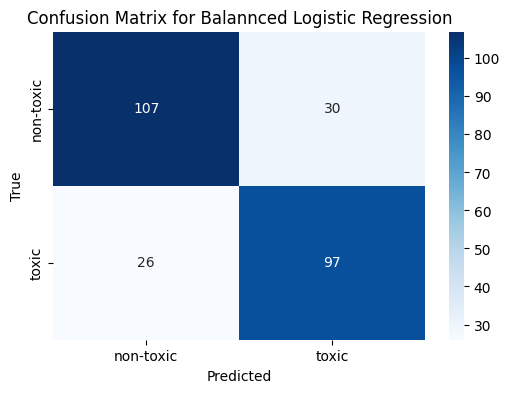

In [77]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Balannced Logistic Regression')
plt.show()


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create vectorizer (remove stopwords)
vectorizer = TfidfVectorizer(stop_words='english')
sentences = combined_df['clean_text'].values
# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sentences)
vectorized_documents.shape

(1300, 6732)

In [59]:
from sklearn.decomposition import PCA
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())
reduced_data.shape

(1300, 2)

In [60]:
from sklearn.cluster import KMeans
# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

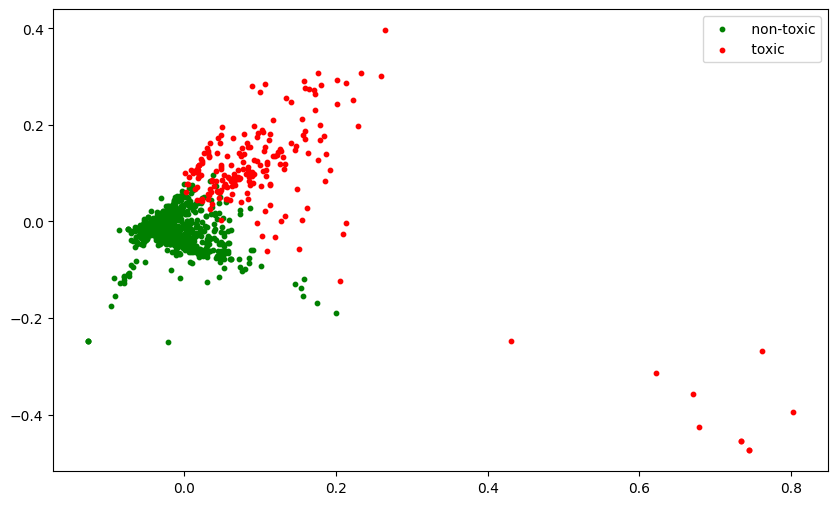

In [61]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# plot the results
colors = ['green', 'red']
cluster = ['non-toxic', 'toxic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()